In [132]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1. Data Exploration and Preprocessing:

•Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

In [67]:
df=pd.read_csv("adult_with_headers.csv")

In [68]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


•	Handle missing values as per the best practices (imputation, removal, etc.).

In [71]:
df.replace(" ?", pd.NA, inplace=True)

In [72]:
df.isnull()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [74]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [75]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)

In [76]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

•	Apply scaling techniques to numerical features:

  •	Standard Scaling
  
  •	Min-Max Scaling


In [78]:
# Selecting numerical columns for scaling
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [79]:
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[num_cols] = standard_scaler.fit_transform(df[num_cols])
df_standard_scaled

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,-0.197409,United-States,<=50K
32557,0.103983,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,>50K
32558,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,-0.035429,United-States,<=50K
32559,-1.215643,Private,0.110960,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,-1.655225,United-States,<=50K


In [80]:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = minmax_scaler.fit_transform(df[num_cols])
df_minmax_scaled

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


•	Discuss the scenarios where each scaling technique is preferred and why.

Scaling Techniques Comparison:

Standard Scaling (Z-score normalization):

Transforms data to have mean = 0 and std = 1.

Useful when data follows a normal distribution.
    
Preferred for linear models (e.g., logistic regression, SVM) as they assume normally distributed inputs.
    
Min-Max Scaling:

Transforms data to range between 0 and 1.
    
Suitable for non-Gaussian distributions.
    
Preferred for neural networks and gradient-based models to prevent large values from dominating smaller ones.

2. Encoding Techniques:

•	Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [85]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('income')  # Exclude target variable

In [86]:
one_hot_cols =df[categorical_cols].nunique()<=5
one_hot_cols 

workclass         False
education         False
marital_status    False
occupation        False
relationship      False
race               True
sex                True
native_country    False
dtype: bool

In [87]:
label_encode_cols =df[categorical_cols].nunique()>5
label_encode_cols 

workclass          True
education          True
marital_status     True
occupation         True
relationship       True
race              False
sex               False
native_country     True
dtype: bool

In [88]:
one_hot_cols = ['race', 'sex']
df_one_hot = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [89]:
label_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']
label_encoders = {col: LabelEncoder() for col in label_cols}

In [90]:
df_label_encoded = df_one_hot.copy()
for col in label_cols:
    df_label_encoded[col] = label_encoders[col].fit_transform(df_label_encoded[col])


In [91]:
df_one_hot['income'] = LabelEncoder().fit_transform(df_one_hot['income'])
df_label_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,6,77516,9,13,4,0,1,2174,0,40,38,<=50K,0,0,0,1,1
1,50,5,83311,9,13,2,3,0,0,0,13,38,<=50K,0,0,0,1,1
2,38,3,215646,11,9,0,5,1,0,0,40,38,<=50K,0,0,0,1,1
3,53,3,234721,1,7,2,5,0,0,0,40,38,<=50K,0,1,0,0,1
4,28,3,338409,9,13,2,9,5,0,0,40,4,<=50K,0,1,0,0,0


One-Hot Encoding (OHE)

 Pros:
 
No Ordinal Relationship Assumed: Converts categories into separate binary columns, avoiding any unintended ranking.

Works Well for Few Categories: Effective when the number of unique values is small (e.g., sex, race).

Better for Tree-Based Models: Decision trees (e.g., Random Forest, XGBoost) handle one-hot encoded data well.

Cons:
Increases Dimensionality: Can create too many new columns if a categorical feature has many unique values.

Higher Memory Usage: More columns mean more memory and slower model training.

Not Ideal for Linear Models: Correlation issues may arise due to the increased number of features.


Label Encoding

Pros:

Efficient Representation: Assigns a unique integer to each category, reducing memory usage.

Works Well for Many Categories: Useful when dealing with high-cardinality categorical features (e.g., native_country).

Suitable for Tree-Based Models: Decision trees can still treat label-encoded categories appropriately.

 Cons:
 
Imposes Ordinal Relationship: Assigns numerical values (e.g., A=0, B=1, C=2), which may mislead linear models.

Not Ideal for Linear Models: Some algorithms might assume an order that does not exist.


In [94]:
# Feature Engineering

# 1. Creating 'capital_diff' (difference between capital gain and loss)
df_label_encoded['capital_diff'] = df_label_encoded['capital_gain'] - df_label_encoded['capital_loss']


In [95]:
# 2. Creating 'work_experience' (approximation based on age and education level)
df_label_encoded['work_experience'] = df_label_encoded['age'] - df_label_encoded['education_num']

3. Feature Engineering:

•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [98]:
# Display first few rows after feature engineering
df_label_encoded[['capital_gain', 'capital_loss', 'capital_diff', 'age', 'education_num', 'work_experience']].head()

,capital_gain,capital_loss,capital_diff,age,education_num,work_experience
0,2174,0,2174,39,13,26
1,0,0,0,50,13,37
2,0,0,0,38,9,29
3,0,0,0,53,7,46
4,0,0,0,28,13,15


•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [100]:
skewness = df_label_encoded[num_cols].apply(lambda x: x.skew())
skewness.sort_values(ascending=False)

capital_gain      11.953848
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64

In [101]:
# Log transformation on capital_gain (adding 1 to avoid log(0))
df_label_encoded['capital_gain_log'] = np.log1p(df_label_encoded['capital_gain'])

# Check new skewness
df_label_encoded['capital_gain_log'].skew()


3.096143524467517

New Features:

capital_diff = capital_gain - capital_loss (captures overall capital change).

work_experience = age - education_num (estimates years of work experience).

Next, I'll apply a log transformation to handle skewness in numerical features. ​​

Skewness Analysis:

Highly skewed: capital_gain (11.95) and capital_loss (4.59).

Moderately skewed: fnlwgt (1.45).

I'll apply a log transformation to capital_gain to reduce skewness. ​

4. Feature Selection:

•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

In [105]:
# Applying Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df_label_encoded[num_cols])
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [106]:
# Removing outliers (where prediction is -1)
df_no_outliers = df_label_encoded[outliers == 1]

In [107]:
# Display the number of rows removed
df_label_encoded.shape[0] - df_no_outliers.shape[0]

326

•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [109]:
pip install pandas==1.5.3


Note: you may need to restart the kernel to use updated packages.


In [110]:
!pip install ppscore

In [111]:
import ppscore as pps

In [112]:
pps_matrix =pps.matrix(df_no_outliers)
pps_matrix 

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.5412,0.634322,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,77515.1178,78903.943015,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.7244,2.764712,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,1.8760,1.913453,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
436,capital_gain_log,race_ White,0.000000,regression,True,mean absolute error,0.1530,0.259113,DecisionTreeRegressor()
437,capital_gain_log,sex_ Male,0.000000,regression,True,mean absolute error,0.3310,0.437054,DecisionTreeRegressor()
438,capital_gain_log,capital_diff,0.754218,regression,True,mean absolute error,671.5754,165.061274,DecisionTreeRegressor()
439,capital_gain_log,work_experience,0.002957,regression,True,mean absolute error,11.0958,11.062993,DecisionTreeRegressor()


In [114]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Selecting numerical and encoded categorical features
X = df_no_outliers.drop(columns=['income'])  # Drop target variable
y = df_no_outliers['income'].astype('category').cat.codes  # Encode target

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Convert to DataFrame for better readability
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df.sort_values(by='MI Score', ascending=False, inplace=True)

# Display top 10 most predictive features
print(mi_df.head(10))


             Feature  MI Score
17      capital_diff  0.114498
7       relationship  0.114170
5     marital_status  0.110215
19  capital_gain_log  0.074163
8       capital_gain  0.073650
0                age  0.065596
3          education  0.064493
4      education_num  0.059559
18   work_experience  0.054094
6         occupation  0.051423


In [122]:
df_no_outliers['income'] = df_no_outliers['income'].astype('category').cat.codes


In [124]:
# Compute correlation with income
correlation_with_income = df_no_outliers.corr()['income'].abs().sort_values(ascending=False)
print(correlation_with_income.head(10))


income              1.000000
education_num       0.326149
capital_gain        0.309171
capital_diff        0.281857
capital_gain_log    0.264800
relationship        0.248573
age                 0.228907
hours_per_week      0.224111
sex_ Male           0.214057
marital_status      0.198139
Name: income, dtype: float64


In [128]:
# Sort PPS scores
pps_sorted = pps_matrix[['x', 'y', 'ppscore']].sort_values(by="ppscore", ascending=False)
print("🔹 Top PPS Scores:")
print(pps_sorted.head(10))

# Compute correlation matrix
correlation_with_income = df_no_outliers.corr()['income'].abs().sort_values(ascending=False)
print("\n🔹 Top Correlated Features with Income:")
print(correlation_with_income.head(10))


🔹 Top PPS Scores:
                  x               y  ppscore
0               age             age      1.0
198    capital_loss    capital_loss      1.0
66        education       education      1.0
67        education   education_num      1.0
87    education_num       education      1.0
88    education_num   education_num      1.0
110  marital_status  marital_status      1.0
132      occupation      occupation      1.0
154    relationship    relationship      1.0
176    capital_gain    capital_gain      1.0

🔹 Top Correlated Features with Income:
income              1.000000
education_num       0.326149
capital_gain        0.309171
capital_diff        0.281857
capital_gain_log    0.264800
relationship        0.248573
age                 0.228907
hours_per_week      0.224111
sex_ Male           0.214057
marital_status      0.198139
Name: income, dtype: float64


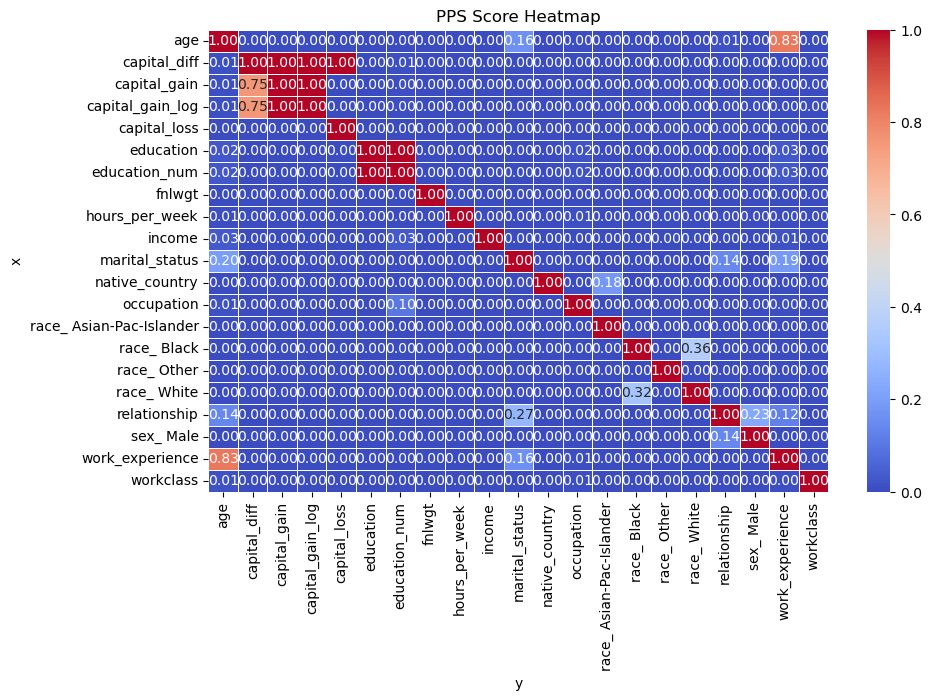

In [134]:
# Convert PPS matrix to a pivot table for visualization
pps_pivot = pps.matrix(df_no_outliers).pivot(index='x', columns='y', values='ppscore')

plt.figure(figsize=(10,6))

# Plot heatmap of PPS scores
sns.heatmap(pps_pivot, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("PPS Score Heatmap")
plt.show()


Key Takeaways

PPS captures both linear & non-linear relationships, unlike correlation.

High PPS but low correlation → suggests a non-linear relationship with income.

Both PPS and correlation are high → indicates a strong linear influence.